In [13]:
from tdc.single_pred import ADME
import pandas as pd


In [14]:
# Load dataset

from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS')
split = data.get_split()

Found local copy...
Loading...
Done!


In [15]:
template = """### Instructions: Answer the following question about drug properties. 
### Context: PAMPA (parallel artificial membrane permeability assay) is a commonly employed assay to evaluate drug permeability across the cellular membrane. 
PAMPA is a non-cell-based, low-cost and high-throughput alternative to cellular models. Although PAMPA does not model active and efflux transporters, 
it still provides permeability values that are useful for absorption prediction because the majority of drugs are absorbed by passive diffusion through the membrane
### Question: Given a drug SMILES string, predict whether it 
(A) has high permeability in PAMPA assay (B) low-to-moderate permeability in PAMPA assay.
SMILES: {} 
### Answer: {}"""


In [16]:
split["train"].head()

,Drug_ID,Drug,Y
0,1259573,COC1=C(C=C(C=C1)CCN2C(=CC(=O)NC2=S)N)OC,0
1,1275864,COC1=C(C=C(C=C1)Cl)C(=O)NC2=CC=C(C=C2)NC(=O)C3...,1
2,2030130,CN1C2=CC=CC=C2C(=O)C3=C1N=C(N(C3=O)C4=CC=CC=C4...,1
3,4422695,CC1=C(C=C(C=C1)NS(=O)(=O)C2=CC=CC(=C2)C(=O)O)S...,1
4,1131802,COC1=CC(=CC(=C1O)OC)C2=NC(=C(N2)C3=CC=CS3)C4=C...,1


In [17]:
# process dataset

def formatting_prompts_func(examples):
    drugs = examples["Drug"]
    outputs       = examples["Y"]
    texts = []
    token_sizes = []
    for instruction, output in zip(drugs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = template.format(instruction, "(A)" if output else "(B)")
        texts.append(text)
        token_sizes.append(len(text))
    return { "text" : texts, "drugs":drugs, "outputs":outputs, "token_size":token_sizes, "ds_ident":"ADME_PAMPA_NCATS"}

def formatting_prompts_func_test(examples):
    drugs = examples["Drug"]
    outputs       = examples["Y"]
    texts = []
    token_sizes = []
    for instruction, output in zip(drugs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = template.format(instruction, "(A)" if output else "(B)")
        texts.append(text)
        token_sizes.append(len(text))
    return { "text" : texts, "drugs":drugs, "outputs":outputs, "token_size":token_sizes, "ds_ident":"ADME_PAMPA_NCATS"}

In [18]:
train_dataset = formatting_prompts_func(split["train"])
valid_dataset = formatting_prompts_func_test(split["valid"])
test_dataset = formatting_prompts_func_test(split["test"])

<Axes: >

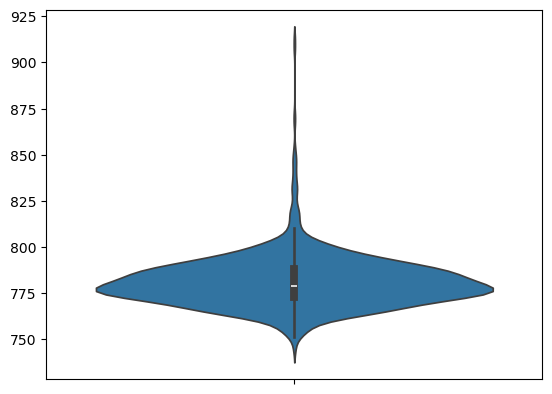

In [19]:
import seaborn as sns

sns.violinplot(train_dataset["token_size"])

In [20]:
len(train_dataset["text"]), len(valid_dataset["text"]), len(test_dataset["text"])

(1424, 203, 407)

In [21]:
import pickle
import os


def dump_file(obj, path, file_name):
    os.makedirs(path, exist_ok=True)
    file_name = os.path.join(path,file_name)
    with open(file_name, "wb") as f0:
        pickle.dump(obj,f0)

In [22]:
dump_file(train_dataset, "processed", "train.pkl")
dump_file(valid_dataset, "processed", "valid.pkl")
dump_file(test_dataset, "processed", "test.pkl")